In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [4]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [5]:
df_train = df.drop(["participant", "category", "set", "duration"], axis=1)

In [6]:
X = df_train.drop("label", axis=1)

In [7]:
y = df_train["label"]

In [8]:
X

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170589,0.892267,-0.170867,-26.845376,-10.337435,25.884281,-0.306177,-0.168731,-0.019613,0.924357,...,0.398177,233.776838,-30.435868,17.847492,-1.965297,-24.466852,12.436928,-54.021700,-12.124224,1
2019-01-11 15:08:08.400,-0.026943,0.874179,-0.057250,-3.439846,-1.785081,2.641767,-0.284199,-0.078192,0.042722,0.876466,...,0.376409,259.903047,-37.890347,-66.582261,-16.027255,7.061419,16.191004,5.206956,-1.743751,1
2019-01-11 15:08:08.800,-0.061235,0.986906,-0.035533,2.845038,-1.432343,-2.098136,-0.324885,-0.067641,0.034320,0.989442,...,0.460699,258.979632,-46.945478,-29.577920,3.656968,-12.117559,-50.138834,36.612704,-11.242312,1
2019-01-11 15:08:09.200,-0.046792,0.978801,-0.036753,0.597036,-3.822361,4.563470,-0.320991,-0.066156,0.037796,0.980607,...,0.488154,251.092240,-31.885615,66.255509,5.333057,15.450696,37.774901,26.255166,-6.819488,1
2019-01-11 15:08:09.600,-0.045576,0.906516,-0.057210,10.418365,5.008932,-9.778520,-0.296427,-0.080285,0.049873,0.909462,...,0.388942,213.194022,-15.926719,18.342209,10.709572,8.837472,23.634115,-34.601700,-34.299045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061905,-0.929998,0.110785,-37.837668,8.252645,15.234692,0.342279,-0.025606,-0.077315,0.938617,...,0.344110,363.811139,27.132352,-53.746661,12.406894,-48.473599,-35.556241,-18.693844,-35.945594,4
2019-01-20 17:33:26.600,-0.022139,-1.210564,-0.110940,-3.701006,-1.351086,6.098735,0.426124,-0.180015,-0.049069,1.215838,...,0.313800,375.084736,37.871967,-19.390934,-15.444639,28.236098,77.581212,23.795192,10.167371,0
2019-01-20 17:33:27.000,-0.045042,-0.976448,-0.061903,2.748413,-4.307783,0.251154,0.345673,-0.147468,-0.052026,0.979444,...,0.225127,317.621650,-33.331619,28.893434,9.980059,-1.078005,-50.328548,-0.748444,0.688502,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [18]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
frequency_features = [f for f in df_train.columns if ("_freq" in f) or ("pse" in f)]
cluster_features = ["cluster"]

print("Basic_features:", len(basic_features))
print("square_features:", len(square_features))
print("pca_features:", len(pca_features))
print("time_features:", len(time_features))
print("frequency_features:", len(frequency_features))
print("cluster_features:", len(cluster_features))

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

Basic_features: 6
square_features: 2
pca_features: 3
time_features: 16
frequency_features: 88
cluster_features: 1


In [19]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

In [20]:
accuracy = accuracy_score(y_test, class_test_y)

In [21]:
accuracy

0.9948293691830403

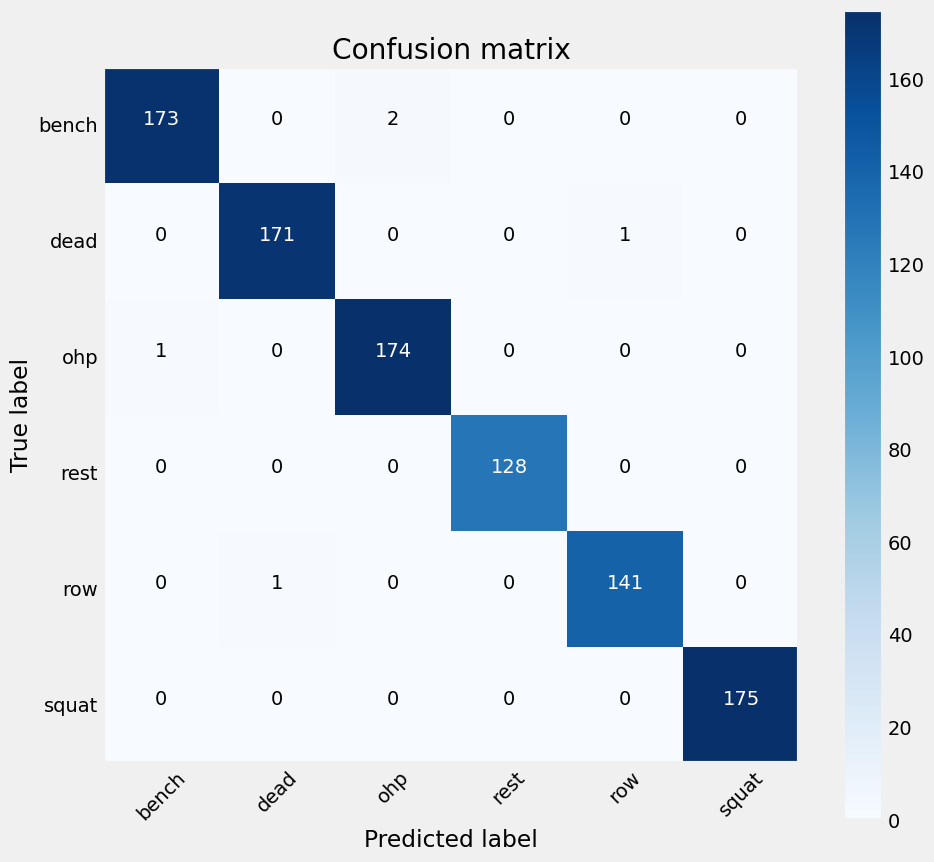

In [22]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, class_test_y, target_names=classes)
print(report)

              precision    recall  f1-score   support

       bench       0.99      0.99      0.99       175
        dead       0.99      0.99      0.99       172
         ohp       0.99      0.99      0.99       175
        rest       1.00      1.00      1.00       128
         row       0.99      0.99      0.99       142
       squat       1.00      1.00      1.00       175

    accuracy                           0.99       967
   macro avg       1.00      1.00      1.00       967
weighted avg       0.99      0.99      0.99       967

